In [1]:
import numpy as np
import pylab as plt
%matplotlib inline 

Some parameters

In [2]:
N = 20 # Number of vertices
R = 1 # Radio for plot
p = 0.1 #probability of connection

In [3]:
A = np.zeros((N,N)) # Starting with a matrix with zeros

In [4]:
# making connections to element in circle 
for i in range(N-1):
    A[i][i+1] = 1
    A[i-1][i] = 1
    for j in range(i):
        if np.random.rand()<p:
            A[j][i] = 1 # connecting vertices with probability p

In [5]:
A = A + A.T # symmetric matrix

In [6]:
A.shape

(20, 20)

Building a similar graph B

In [7]:
B = np.zeros((N,N))

In [8]:
for i in range(N-1):
    B[i][i+1] = 1
    B[i-1][i] = 1
    for j in range(i):
        if np.random.rand()<p:
            B[j][i] = 1

In [9]:
B = B + B.T

In [10]:
B.shape

(20, 20)

Plotting the two graphs

In [11]:
XA = R*np.cos(np.linspace(-np.pi, np.pi, N))
YA = R*np.sin(np.linspace(-np.pi, np.pi, N))
XB = R*np.cos(np.linspace(-np.pi, np.pi, N)) + 3
YB = R*np.sin(np.linspace(-np.pi, np.pi, N))

(-2.0, 5.0, -1.5, 1.5)

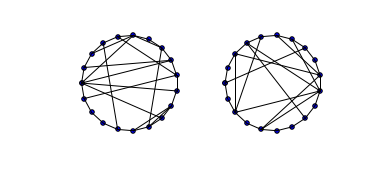

In [31]:
fig, ax = plt.subplots()
plt.scatter(XA,YA)
for ni in range(N):
    for nj in range(ni):
        if A[ni][nj] == 1.:
            plt.plot([XA[ni],XA[nj]],[YA[ni],YA[nj]],'k')

plt.scatter(XB,YB)
for ni in range(N):
    for nj in range(ni):
        if B[ni][nj] == 1.:
            plt.plot([XB[ni],XB[nj]],[YB[ni],YB[nj]],'k')
ax.set_aspect('equal')
plt.axis('off')

Building joint adjacency matrix

In [13]:
MA1 = np.array([np.concatenate((A[i],np.zeros(N))) for i in range(N)])

In [14]:
MA1.shape

(20, 40)

In [15]:
MA2 = np.zeros((N,2*N))

In [16]:
MA = np.concatenate((MA1,MA2))

In [17]:
MB2 = np.array([np.concatenate((np.zeros(N), B[i])) for i in range(N)])

In [18]:
MB1 = np.zeros((N,2*N))

In [19]:
MB = np.concatenate((MB1,MB2))

In [20]:
M = MA + MB

(0.0, 40.0, 0.0, 40.0)

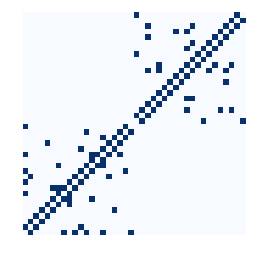

In [21]:
# heat mat represents the joint adjacency matrix
fig2, ax2 = plt.subplots()
heatmap = ax2.pcolor(M, cmap=plt.cm.Blues)
ax2.set_aspect('equal')
plt.axis('off')

Now the Laplacian of the two graphs

In [22]:
L = np.diag(M.sum(axis=1))-M

In [23]:
#finding the eigenvalues
E_L = np.around(np.linalg.eigvals(L), decimals = 3)

Connecting the two graphs via the interface (starting with one node)

In [32]:
M_C = M[:][:] # copying above matrix

In [33]:
# only one new edge, connecting node 5 of G1 and node 15 from G2
M_C[5][35] = 1
M_C[35][5] = 1

(-2.0, 5.0, -1.5, 1.5)

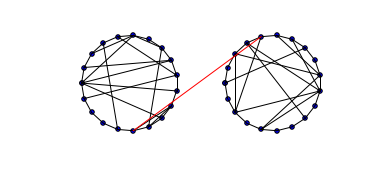

In [34]:
fig, ax = plt.subplots()
plt.scatter(XA,YA)
for ni in range(N):
    for nj in range(ni):
        if A[ni][nj] == 1.:
            plt.plot([XA[ni],XA[nj]],[YA[ni],YA[nj]],'k')

plt.scatter(XB,YB)
for ni in range(N):
    for nj in range(ni):
        if B[ni][nj] == 1.:
            plt.plot([XB[ni],XB[nj]],[YB[ni],YB[nj]],'k')

plt.plot([XA[5],XB[15]],[YA[5],YB[15]],'red')

ax.set_aspect('equal')
plt.axis('off')

(0.0, 40.0, 0.0, 40.0)

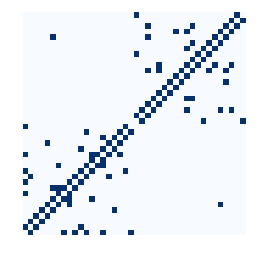

In [36]:
# New heat map has a dot on overlapping region
fig3, ax3 = plt.subplots()
heatmap = ax3.pcolor(M_C, cmap=plt.cm.Blues)
ax3.set_aspect('equal')
plt.axis('off')

In [37]:
L_C = np.diag(M_C.sum(axis=1))-M_C # Laplacian of new matrix

In [38]:
E_L_C = np.around(np.linalg.eigvals(L_C), decimals = 3)

(array([ 2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  2.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,
         1.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  2.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.]),
 array([ 0.     ,  0.10085,  0.2017 ,  0.30255,  0.4034 ,  0.50425,
         0.6051 ,  0.70595,  0.8068 ,  0.90765,  1.0085 ,  1.10935,
         1.2102 ,  1.31105,  1.4119 ,  1.51275,  1.6136 ,  1.71445,
         1.8153 ,  1.91615,  2.017  ,  2.11785,  2.2187 ,  2.31955,
         2.4204 ,  2.52125,  2.6221 ,  2.72295,  2.8238 ,  2.92465,
         3.0255 ,  3.12635,  3.2272 ,  3.32805,  3.4289 ,  3.52975,
         3.6306 ,  3.73145,  3.8323 ,  3.93315,  4.034  ,  4.13485,
         4.2357 ,  4.33655,  4.4374 ,  4.53825,  4.6391 ,  4.73995

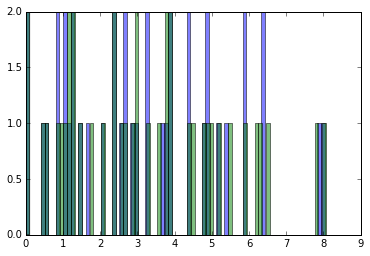

In [43]:
plt.hist(E_L, alpha = 0.5, bins = 80)
plt.hist(E_L_C, alpha = 0.5, bins = 80)

In [44]:
E_L.sort()

In [45]:
E_L

array([ 0.   ,  0.   ,  0.447,  0.587,  0.806,  0.84 ,  1.074,  1.085,
        1.141,  1.213,  1.305,  1.493,  1.652,  2.013,  2.33 ,  2.391,
        2.598,  2.624,  2.695,  2.891,  2.963,  3.246,  3.294,  3.71 ,
        3.785,  3.859,  3.866,  4.335,  4.348,  4.765,  4.825,  4.911,
        5.152,  5.328,  5.886,  5.91 ,  6.348,  6.378,  7.865,  8.039])

In [46]:
E_L_C.sort()

In [47]:
E_L_C

array([ 0.   ,  0.053,  0.447,  0.589,  0.81 ,  0.92 ,  1.075,  1.135,
        1.145,  1.253,  1.305,  1.497,  1.76 ,  2.021,  2.331,  2.405,
        2.598,  2.646,  2.866,  2.925,  2.99 ,  3.256,  3.558,  3.777,
        3.822,  3.859,  3.906,  4.338,  4.47 ,  4.825,  4.841,  4.989,
        5.186,  5.511,  5.901,  6.194,  6.349,  6.511,  7.866,  8.068])